In [16]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib
import matplotlib.pyplot as plt
import shapely

from shapely import wkt

import warnings
warnings.filterwarnings('ignore')

# Read Data

## PLZ Data

In [17]:
plz = pd.read_csv('../data/plz.csv').drop('Unnamed: 0', axis=1)
plz['geometry'] = plz['geometry'].apply(lambda geo: wkt.loads(geo))
plz.crs = "EPSG:4326"
plz = gpd.GeoDataFrame(plz)

## Bounding Data

In [18]:
bounding_frame = pd.read_csv('../data/bounding_coordinates.csv').drop('Unnamed: 0', axis=1)
bounding_frame['geometry'] = bounding_frame['geometry'].apply(lambda geo: wkt.loads(geo))
bounding_frame.crs = "EPSG:4326"
bounding_frame = gpd.GeoDataFrame(bounding_frame)

## Green Space Data

In [19]:
green_data = pd.read_csv('../data/green_space_data.csv').drop('Unnamed: 0', axis=1)
green_data['geometry'] = green_data['geometry'].apply(lambda geo: wkt.loads(geo))
green_data.crs = "EPSG:4326"
green_data = gpd.GeoDataFrame(green_data)

# Define Colourmap

In [20]:
from matplotlib import cm
class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = matplotlib.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [21]:
COL = MplColorHelper('GnBu', 0, 100)

In [22]:
colour_list = []
for i in range(0, 100):
    rgb_val = [val for val in COL.get_rgb(i)]
    rgb_val[-1] = 0
    colour_list.append(rgb_val)

In [23]:
my_cmap_none = matplotlib.colors.ListedColormap(colour_list, name='custom')

# Plot Map

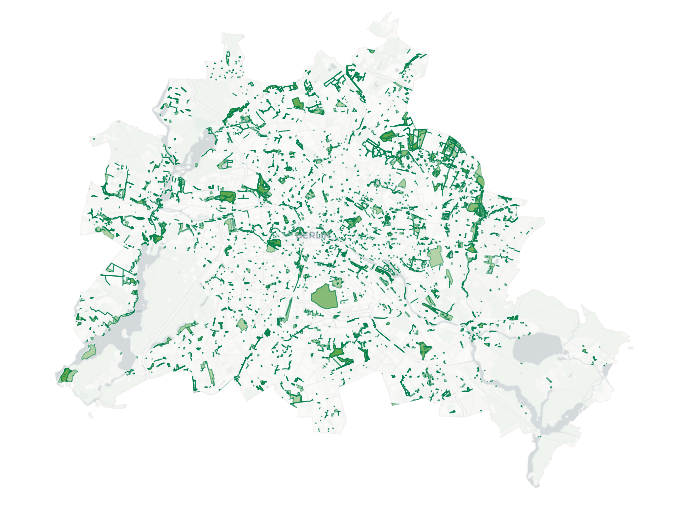

In [24]:
ax = gplt.webmap(
    plz,
    provider=ctx.providers.CartoDB.Positron,
    figsize=(12, 12),
    zorder=1
)

gplt.polyplot(
    green_data, 
    linewidth=.45,
    ax=ax,
    facecolor=[(93/255, 164/255, 70/255, 0.45)],
    edgecolor='#037f51',
    zorder=1
)

gplt.kdeplot(
    bounding_frame,
    clip=plz,
    projection=gcrs.WebMercator(), 
    cmap=my_cmap_none, 
    shade=True,
    ax=ax,
    zorder=3
)